Notebook to study LJ pT and bound state mass resolution

In [1]:
# python
import sys
import statistics
import os
import importlib
# columnar analysis
import awkward as ak
from dask.distributed import Client
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import processor
import hist
import matplotlib
import matplotlib.patches as patches
import numpy
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities, cutflow, scaleout
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
#utilities.set_plot_style()
%matplotlib inline

Start by looking at default 2mu2e sample with 2mu2e selection and matched dark photons.

In [2]:
samples = [
    "4mu_100GeV_0p25GeV_0p02mm",
    #"4mu_100GeV_0p25GeV_0p2mm",
    #"4mu_100GeV_0p25GeV_2p0mm",
    #"4mu_100GeV_0p25GeV_10p0mm",
    #"4mu_100GeV_0p25GeV_20p0mm",
    #"4mu_1000GeV_5p0GeV_0p04mm",
    #"4mu_1000GeV_5p0GeV_0p4mm",
    #"4mu_1000GeV_5p0GeV_4p0mm",
    #"4mu_1000GeV_5p0GeV_20p0mm",
    #"4mu_1000GeV_5p0GeV_40p0mm",
    #"2mu2e_500GeV_5GeV_0p8mm",
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=1)

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.DaskExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    # maxchunks=1,
)

hist_menu = utilities.load_yaml("../configs/hist_collections.yaml")
hist_choice = "base_plus_gen_resolution"
collection = utilities.flatten(hist_menu[hist_choice]) #To change the histograms used, swap "base" for the other collections
p = sidm_processor.SidmProcessor(
    [
        "base",
        "baseNoLj",
        "4mu", # basic cuts + 4mu requirement
        "2mu2e",
        "matchedLj", # strict cuts on lj objects
        "4mu_matchedLj",
    ],
    [hist_choice],
    lj_reco_choices=["0.4"],
    llpnanoaod=True,
)
output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel baseNoLj

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genA_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genA_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'gen_abspid']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genA_egmLj_lxyRatio']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genA_muLj_lxyRatio']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'mu_lj_genA_ptRatio', 'mu_lj_recolxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'egm_lj_genA_ptRatio', 'egm_lj_recolxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'mu_lj_genA_ptRatio', 'mu_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon0_genMu0_ptRatio', 'dsaMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon0_genMu0_ptRatio', 'pfMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genMu0_pt', 'dsaMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genMu0_pt', 'pfMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon0_genMu0_ptRatio', 'genMu0_pt', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genA_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genA_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'gen_abspid']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genA_egmLj_lxyRatio']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genA_muLj_lxyRatio']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'mu_lj_genA_ptRatio', 'mu_lj_recolxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'egm_lj_genA_ptRatio', 'egm_lj_recolxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'mu_lj_genA_ptRatio', 'mu_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon0_genMu0_ptRatio', 'dsaMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon0_genMu0_ptRatio', 'pfMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genMu0_pt', 'dsaMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genMu0_pt', 'pfMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon0_genMu0_ptRatio', 'genMu0_pt', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon0_muLj_ptRatio', 'genMu0_pt', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genA_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genA_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'gen_abspid']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genA_egmLj_lxyRatio']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genA_muLj_lxyRatio']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'mu_lj_genA_ptRatio', 'mu_lj_recolxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'egm_lj_genA_ptRatio', 'egm_lj_recolxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'mu_lj_genA_ptRatio', 'mu_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon0_genMu0_ptRatio', 'dsaMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon0_genMu0_ptRatio', 'pfMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genMu0_pt', 'dsaMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genMu0_pt', 'pfMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon0_genMu0_ptRatio', 'genMu0_pt', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genA_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genA_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'gen_abspid']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genA_egmLj_lxyRatio']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genA_muLj_lxyRatio']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'mu_lj_genA_ptRatio', 'mu_lj_recolxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'egm_lj_genA_ptRatio', 'egm_lj_recolxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'mu_lj_genA_ptRatio', 'mu_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon0_genMu0_ptRatio', 'dsaMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon0_genMu0_ptRatio', 'pfMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genMu0_pt', 'dsaMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genMu0_pt', 'pfMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genA_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genA_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'gen_abspid']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genA_egmLj_lxyRatio']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genA_muLj_lxyRatio']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'mu_lj_genA_ptRatio', 'mu_lj_recolxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'egm_lj_genA_ptRatio', 'egm_lj_recolxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'mu_lj_genA_ptRatio', 'mu_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon0_genMu0_ptRatio', 'dsaMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon0_genMu0_ptRatio', 'pfMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genMu0_pt', 'dsaMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genMu0_pt', 'pfMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon0_genMu0_ptRatio', 'genMu0_pt', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genMu_genMu_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genMu_genMu_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genA_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genE_genE_dR_lowRange', 'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genE_genE_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_lxy',
'genA_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'genA_pt', 
'genA_lxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', '$Z_d$ 
$L_{xy}$ $(cm)$']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'gen_abspid']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genA_egmLj_lxyRatio']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genA_muLj_lxyRatio']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'mu_lj_genA_ptRatio', 'mu_lj_recolxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'egm_lj_genA_ptRatio', 'egm_lj_recolxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'mu_lj_genA_ptRatio', 'mu_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon0_genMu0_ptRatio', 'dsaMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon0_genMu0_ptRatio', 'pfMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genMu0_pt', 'dsaMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'genMu0_pt', 'pfMuon0_lj_truelxy']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon0_genMu0_ptRatio', 'genMu0_pt', 'weight']

Take a look at ratio of LJ pT to dark photon pT

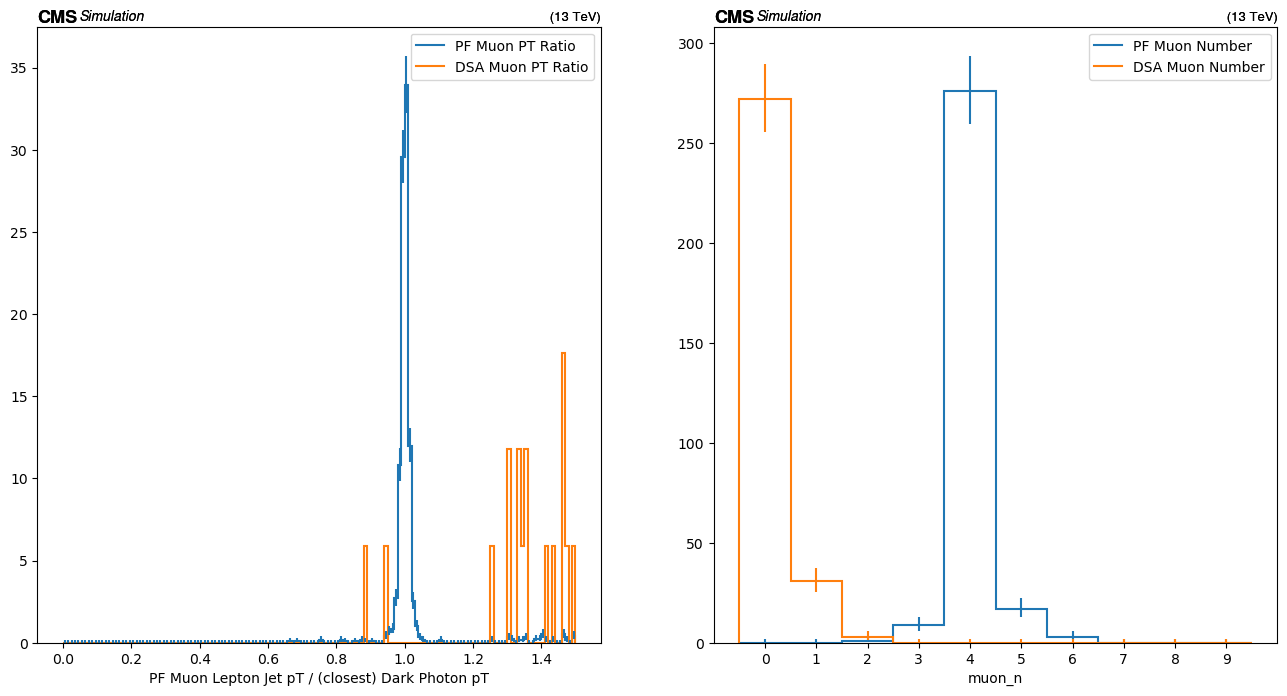

In [4]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
utilities.plot(out[samples[0]]["hists"]["genA_pfMuonLj_ptRatio"]["base", :1.5j], density=True, flow='none')
utilities.plot(out[samples[0]]["hists"]["genA_dsaMuonLj_ptRatio"]["base", :1.5j], density=True, yerr=False, flow='none')
plt.legend(["PF Muon PT Ratio", "DSA Muon PT Ratio"])
plt.subplot(1,2,2)
utilities.plot(out[samples[0]]["hists"]["muon_n"]["base", :], density=False, yerr=True, flow='none')
utilities.plot(out[samples[0]]["hists"]["dsaMuon_n"]["base", :], density=False, yerr=True, flow='none')
plt.legend(["PF Muon Number", "DSA Muon Number"])


Not bad. Try breaking it down by type.

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


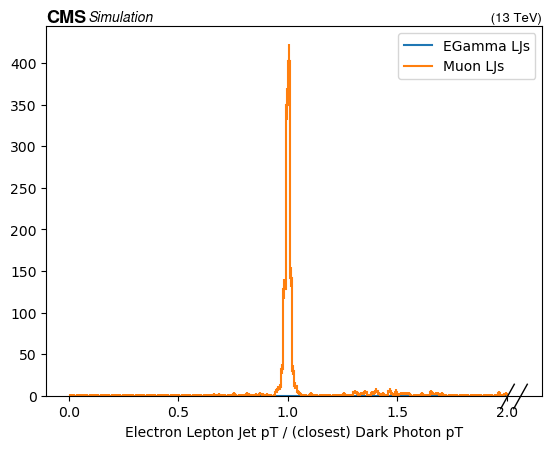

In [5]:
utilities.plot([
    out[samples[0]]["hists"]["genA_electronLj_ptRatio"]["base", :],
    out[samples[0]]["hists"]["genA_pfMuonLj_ptRatio"]["base", :],
])
plt.legend(["EGamma LJs", "Muon LJs"])

Muon LJs do a little better job than EGamma and are a little more symmetric about 1.0, but both are pretty good.

Would be nice to see how this varies with bound state mass, dark photon decay length, and dsa- vs pf-muons. Plan to return to this later.

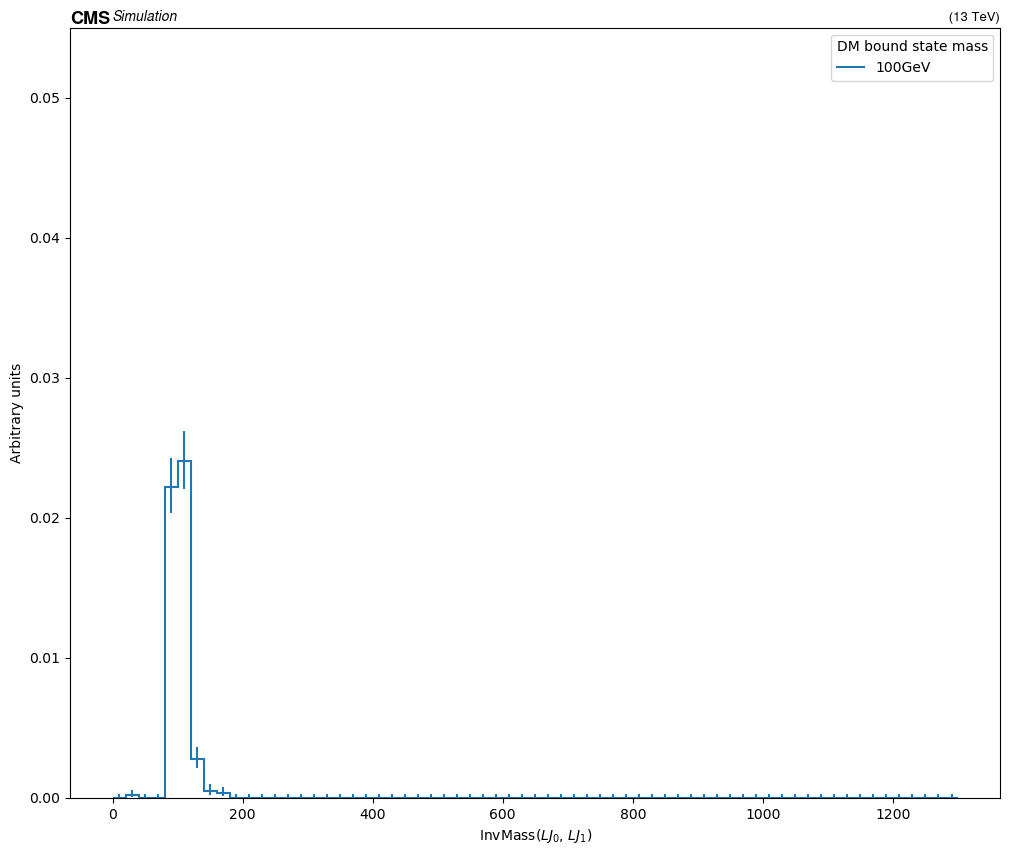

In [6]:
masses = [s.split("_")[1] for s in samples[:]]
plt.subplots(1, 1, figsize=(12, 10))
plt.subplot(1, 1, 1)
for sample in samples[:]:
    utilities.plot(output["out"][sample]["hists"]["lj_lj_invmass"]["base", :1300j], density=True, flow='none')
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylabel("Arbitrary units")
    plt.ylim(0, 0.055)